In [ ]:
#import module yang diperlukan untuk komputasi
import xarray as xr
import numpy as np

In [ ]:
pip install xarray==0.19

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 827 kB 8.6 MB/s 
  Attempting uninstall: xarray
    Found existing installation: xarray 0.20.2
    Uninstalling xarray-0.20.2:
      Successfully uninstalled xarray-0.20.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray-einstats 0.2.2 requires xarray>=0.20, but you have xarray 0.19.0 which is incompatible.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ds = xr.open_dataset("/content/drive/MyDrive/Dataset_Ose_MBKM/Suhu_Salinitas.nc")
ds_wave = xr.open_dataset("/content/drive/MyDrive/Dataset_Ose_MBKM/arus2.nc")
ds_wave

<xarray.Dataset>
Dimensions:    (depth: 36, latitude: 97, time: 8, longitude: 181)
Coordinates:
  * depth      (depth) float32 0.494 1.541 2.646 3.819 ... 763.3 902.3 1.062e+03
  * latitude   (latitude) float32 -8.0 -7.917 -7.833 ... -0.1667 -0.08333 0.0
  * time       (time) datetime64[ns] 2022-01-16T12:00:00 ... 2022-08-16T12:00:00
  * longitude  (longitude) float32 105.0 105.1 105.2 105.2 ... 119.8 119.9 120.0
Data variables:
    vo         (time, depth, latitude, longitude) float32 ...
    thetao     (time, depth, latitude, longitude) float32 ...
    uo         (time, depth, latitude, longitude) float32 ...
    so         (time, depth, latitude, longitude) float32 ...
    zos        (time, latitude, longitude) float32 ...
Attributes: (12/18)
    title:                         Monthly mean fields for product GLOBAL_ANA...
    references:                    http://marine.copernicus.eu
    credit:                        E.U. Copernicus Marine Service Information...
    licence:                       http://marine.copernicus.eu/services-portf...
    contact:                       servicedesk.cmems@mercator-ocean.eu
    producer:                      CMEMS - Global Monitoring and Forecasting ...
    ...                            ...
    product_user_manual:           http://marine.copernicus.eu/documents/PUM/...
    quality_information_document:  http://marine.copernicus.eu/documents/QUID...
    _CoordSysBuilder:              ucar.nc2.dataset.conv.CF1Convention
    Conventions:                   CF-1.0
    comment:                       
    history:                       Data extracted from dataset http://localho...

In [ ]:
#definisikan variabel pada dataset awal
suhu = ds.thetao
salinitas = ds.so
kedalaman = ds.depth

In [ ]:
kec = ds_wave.vo
arah = ds_wave.uo

In [ ]:
#cek dimensi pada variabel terdefinisi
suhu.dims

('time', 'depth', 'latitude', 'longitude')

In [ ]:
suhu.latitude

<xarray.DataArray 'latitude' (latitude: 121)>
array([-10.      ,  -9.916667,  -9.833333,  -9.75    ,  -9.666667,  -9.583333,
        -9.5     ,  -9.416667,  -9.333333,  -9.25    ,  -9.166667,  -9.083333,
        -9.      ,  -8.916667,  -8.833333,  -8.75    ,  -8.666667,  -8.583333,
        -8.5     ,  -8.416667,  -8.333333,  -8.25    ,  -8.166667,  -8.083333,
        -8.      ,  -7.916667,  -7.833333,  -7.75    ,  -7.666667,  -7.583333,
        -7.5     ,  -7.416667,  -7.333333,  -7.25    ,  -7.166667,  -7.083333,
        -7.      ,  -6.916667,  -6.833333,  -6.75    ,  -6.666667,  -6.583333,
        -6.5     ,  -6.416667,  -6.333333,  -6.25    ,  -6.166667,  -6.083333,
        -6.      ,  -5.916667,  -5.833333,  -5.75    ,  -5.666667,  -5.583333,
        -5.5     ,  -5.416667,  -5.333333,  -5.25    ,  -5.166667,  -5.083333,
        -5.      ,  -4.916667,  -4.833333,  -4.75    ,  -4.666667,  -4.583333,
        -4.5     ,  -4.416667,  -4.333333,  -4.25    ,  -4.166667,  -4.083333,
        -4.      ,  -3.916667,  -3.833333,  -3.75    ,  -3.666667,  -3.583333,
        -3.5     ,  -3.416667,  -3.333333,  -3.25    ,  -3.166667,  -3.083333,
        -3.      ,  -2.916667,  -2.833333,  -2.75    ,  -2.666667,  -2.583333,
        -2.5     ,  -2.416667,  -2.333333,  -2.25    ,  -2.166667,  -2.083333,
        -2.      ,  -1.916667,  -1.833333,  -1.75    ,  -1.666667,  -1.583333,
        -1.5     ,  -1.416667,  -1.333333,  -1.25    ,  -1.166667,  -1.083333,
        -1.      ,  -0.916667,  -0.833333,  -0.75    ,  -0.666667,  -0.583333,
        -0.5     ,  -0.416667,  -0.333333,  -0.25    ,  -0.166667,  -0.083333,
         0.      ], dtype=float32)
Coordinates:
  * latitude  (latitude) float32 -10.0 -9.917 -9.833 ... -0.1667 -0.08333 0.0
Attributes:
    valid_min:            -10.0
    valid_max:            0.0
    step:                 0.08333588
    units:                degrees_north
    unit_long:            Degrees North
    long_name:            Latitude
    standard_name:        latitude
    axis:                 Y
    _ChunkSizes:          2041
    _CoordinateAxisType:  Lat

In [ ]:
suhu_permukaan = suhu.isel(depth=0)
suhu_permukaan

<xarray.DataArray 'thetao' (time: 329, latitude: 121, longitude: 181)>
[7205429 values with dtype=float32]
Coordinates:
    depth      float32 0.494
  * latitude   (latitude) float32 -10.0 -9.917 -9.833 ... -0.1667 -0.08333 0.0
  * time       (time) datetime64[ns] 1993-01-16T12:00:00 ... 2020-05-16T12:00:00
  * longitude  (longitude) float32 105.0 105.1 105.2 105.2 ... 119.8 119.9 120.0
Attributes:
    long_name:      Temperature
    standard_name:  sea_water_potential_temperature
    units:          degrees_C
    unit_long:      Degrees Celsius
    cell_methods:   area: mean
    _ChunkSizes:    [  1   7 341 720]

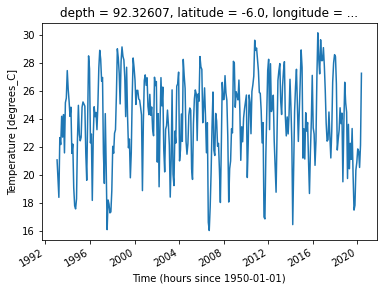

In [ ]:
#plot time series
suhu.sel(depth=100,longitude=11,latitude=-6,method="nearest").plot()

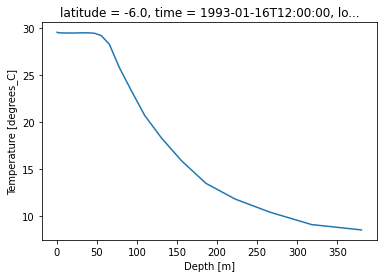

In [ ]:
#plot pada titik (longitude, latitude) dan waktu tertentu
suhu.sel(time="1993-01-16",latitude=-6,longitude=118,method="nearest").transpose().plot()

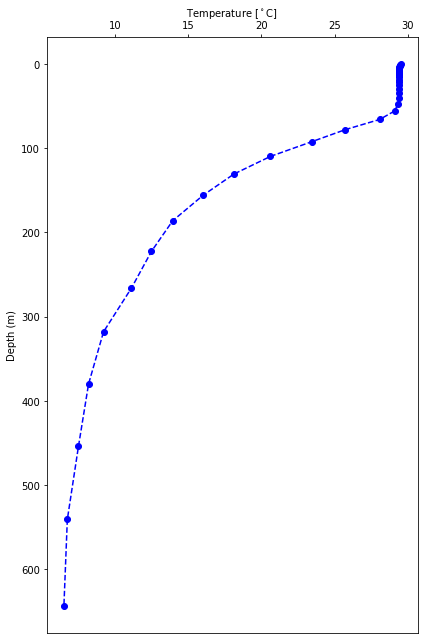

In [ ]:
import matplotlib.pyplot as plt

fig1, (ax1) = plt.subplots(1,sharey=True,figsize=(6, 9))
ax1.plot(suhu.sel(time="1993-01-16",latitude=-6,longitude=119,method="nearest").transpose(),kedalaman,'o--b')
ax1.set_ylim(ax1.get_ylim()[::-1]) # reverse y axis and set limits
ax1.set_xlabel('Temperature [$^\circ$C]') # x axis label
ax1.set_ylabel('Depth (m)') # y axis label
ax1.xaxis.set_label_position('top') # move x axis label to top
ax1.xaxis.set_ticks_position('top') # move x axis ticks to top

plt.tight_layout()
plt.savefig('suhu.png',
format='png', dpi=600, transparent=False)
plt.show()

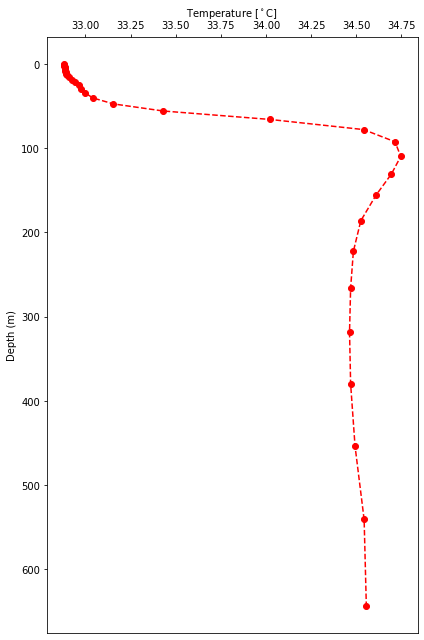

In [ ]:
import matplotlib.pyplot as plt

fig1, (ax1) = plt.subplots(1,sharey=True,figsize=(6, 9))
ax1.plot(salinitas.sel(time="1993-01-16",latitude=-6,longitude=119,method="nearest").transpose(),kedalaman,'o--r')
ax1.set_ylim(ax1.get_ylim()[::-1]) # reverse y axis and set limits
ax1.set_xlabel('Temperature [$^\circ$C]') # x axis label
ax1.set_ylabel('Depth (m)') # y axis label
ax1.xaxis.set_label_position('top') # move x axis label to top
ax1.xaxis.set_ticks_position('top') # move x axis ticks to top

plt.tight_layout()
plt.savefig('salinitas.png',
format='png', dpi=600, transparent=False)
plt.show()

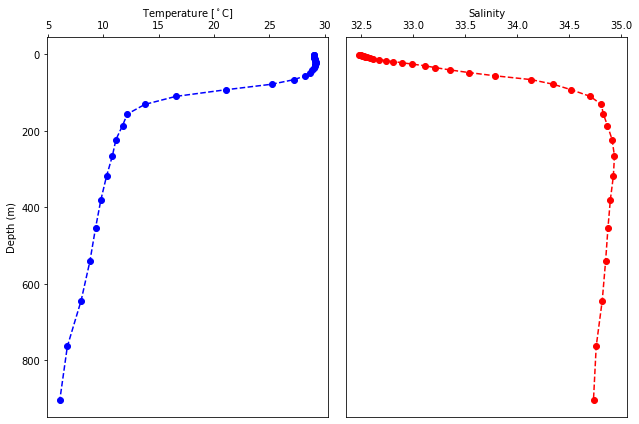

In [ ]:
import matplotlib.pyplot as plt
fig1, (ax1, ax2) = plt.subplots(1,2,sharey=True,figsize=(9, 6))
ax1.plot(suhu.sel(time="1993-01-16",latitude=-6,longitude=11,method="nearest").transpose(),kedalaman,'o--b')
ax1.set_ylim(ax1.get_ylim()[::-1]) # reverse y axis and set limits
ax1.set_xlabel('Temperature [$^\circ$C]') # x axis label
ax1.set_ylabel('Depth (m)') # y axis label
ax1.xaxis.set_label_position('top') # move x axis label to top
ax1.xaxis.set_ticks_position('top') # move x axis ticks to top

ax2.plot(salinitas.sel(time="1993-01-16",latitude=-6,longitude=11,method="nearest").transpose(),kedalaman,'o--r')
ax2.set_xlabel('Salinity')
#ax2.set_xlim(mins,maxs) # set x axis limits
ax2.xaxis.set_label_position('top')
ax2.xaxis.set_ticks_position('top')
ax2.yaxis.set_visible(False) # hide y axis for 2nd subplot

plt.tight_layout()
plt.savefig('suhu-salinitas.png',
format='png', dpi=600, transparent=False)
plt.show()

In [ ]:
#klimatologi pada suhu dan salinitas
suhu_klimat = suhu.groupby("time.month").mean(dim="time")
salinitas_klimat = salinitas.groupby("time.month").mean(dim="time")

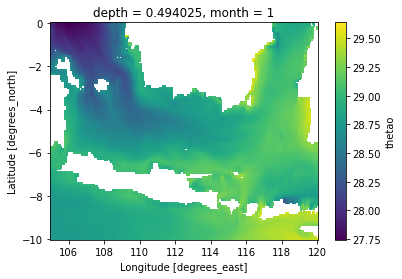

In [ ]:
#plot hasil klimatologi suhu pada bulan pertama (Jan)
suhu_klimat.sel(depth=0.5,month=1,method="nearest").plot()

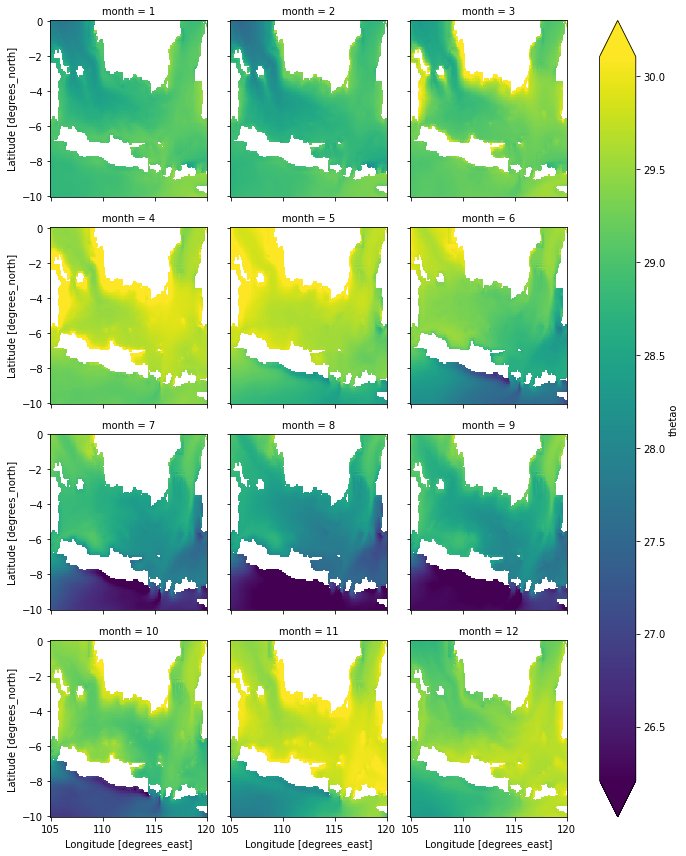

In [ ]:
#plot keseluruhan suhu bulan pada kedalaman pertama
suhu_klimat.sel(depth=0,method="nearest").plot(col="month",col_wrap=3,robust=True)

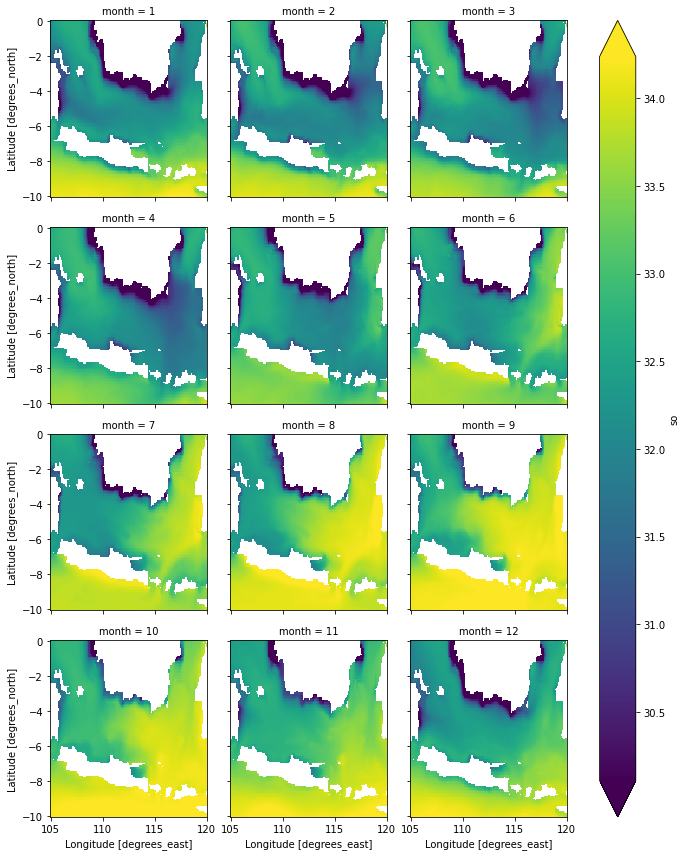

In [ ]:
#plot keseluruhan suhu bulan pada kedalaman pertama
salinitas_klimat.sel(depth=0,method="nearest").plot(col="month",col_wrap=3,robust=True)

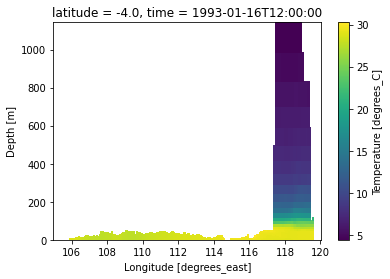

In [ ]:
suhu.sel(latitude=-4, time='1993-01-16T12:00:00.000000000').plot()

In [ ]:
import xarray as xr
import hvplot.xarray
import holoviews as hv
plot=ds['thetao'].hvplot.contourf(z='thetao', x='longitude', y='depth')
plot
plot.opts(invert_yaxis=True)

:DynamicMap   [time,latitude]
   :Polygons   [longitude,depth]   (thetao)

In [ ]:
pip install hvplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.2 MB 9.5 MB/s 


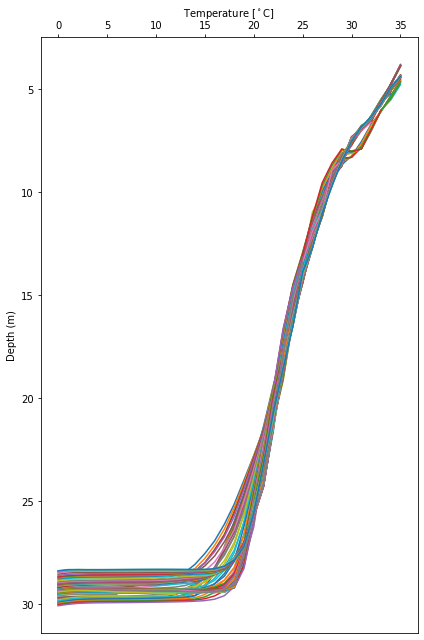

In [ ]:
import matplotlib.pyplot as plt

fig1, (ax1) = plt.subplots(1,sharey=True,figsize=(6, 9))
ax1.plot(suhu.sel(longitude=119, time='1993-01-16T12:00:00.000000000'))
ax1.set_ylim(ax1.get_ylim()[::-1]) # reverse y axis and set limits
ax1.set_xlabel('Temperature [$^\circ$C]') # x axis label
ax1.set_ylabel('Depth (m)') # y axis label
ax1.xaxis.set_label_position('top') # move x axis label to top
ax1.xaxis.set_ticks_position('top') # move x axis ticks to top

plt.tight_layout()
plt.savefig('suhu.png',
format='png', dpi=600, transparent=False)
plt.show()

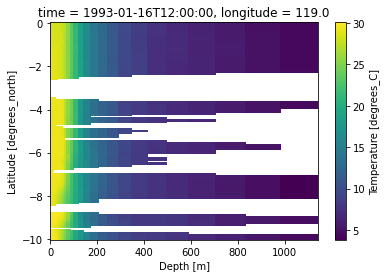

In [ ]:
suhu.sel(longitude=119, time='1993-01-16T12:00:00.000000000').transpose().plot()

In [ ]:
pip install cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.8 MB 6.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 53.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 46.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 47.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 6.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 46 kB 4.4 MB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37m-

In [ ]:
pip install cmocean

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 223 kB 8.2 MB/s 


In [ ]:
import os
import numpy as np
import xarray as xr

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
cartopy.config['data_dir'] = os.getenv('CARTOPY_DIR', cartopy.config.get('data_dir'))

import cmocean

from matplotlib import pyplot as plt
#%config InlineBackend.figure_format = 'retina'
plt.ion()  # To trigger the interactive inline mode

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [ ]:
min_lon = 105.5    # lower left longitude
min_lat = -6.5     # lower left latitude
max_lon = 107.5     # upper right longitude
max_lat = -8.5     # upper right latitude

# Defining the boundaries
lon_bnds = [min_lon, max_lon]
lat_bnds = [min_lat, max_lat]

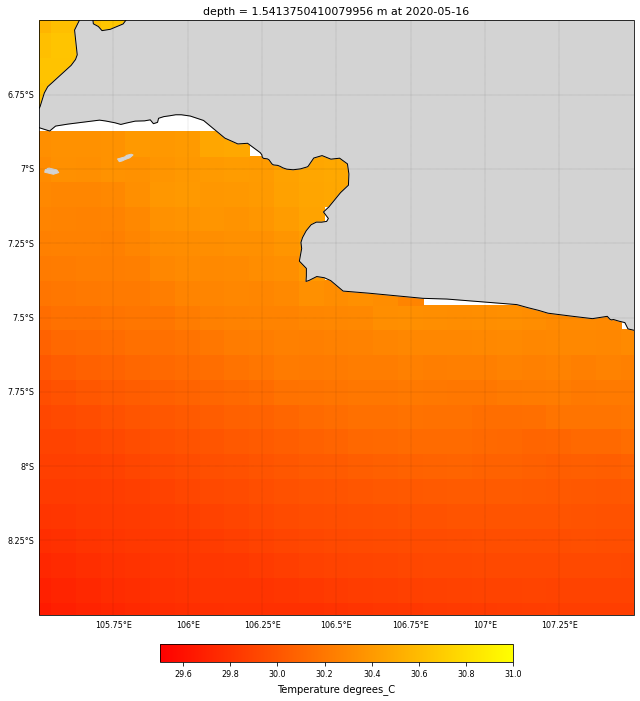

<Figure size 432x288 with 0 Axes>

In [ ]:
# Figure size
size = (9, 10)

# Color from cmocean
color = cmocean.cm.balance

# Defining the figure
fig = plt.figure(figsize=size, facecolor='w', edgecolor='k')

# Axes with Cartopy projection
ax = plt.axes(projection=ccrs.PlateCarree())
# and extent
ax.set_extent([min_lon, max_lon, min_lat, max_lat], ccrs.PlateCarree())
# Plotting using Matplotlib
# We plot the PH at the surface at the final recorded time interval
cf = suhu.isel(time=-1,depth=5).plot(
    transform=ccrs.PlateCarree(), cmap='autumn',
    vmin = 29.5, vmax = 31,
    add_colorbar=False
)


# Color bar
cbar = fig.colorbar(cf, ax=ax, fraction=0.027, pad=0.045,
                    orientation="horizontal")
cbar.set_label(suhu.long_name+' '+suhu.units, rotation=0,
               labelpad=5, fontsize=10)
cbar.ax.tick_params(labelsize=8)

# Title
plt.title('depth = '+str(ds.depth.values.item(1))+' m at '+str(ds.coords['time'].values[-1])[:10],
          fontsize=11
         )

# Plot lat/lon grid
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.1, color='k', alpha=1,
                  linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8}

# Add map features with Cartopy
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                            edgecolor='face',
                                            facecolor='lightgray'))
ax.coastlines(linewidth=1)

# Site Davies Reef
ax.scatter(-5, 110, c='deeppink', s=50, edgecolors='k', linewidth=1, transform=ccrs.PlateCarree())

plt.tight_layout()
plt.show()
fig.clear()
plt.close(fig)
plt.clf()

In [ ]:
pip uninstall shapely

Found existing installation: Shapely 1.8.4
Uninstalling Shapely-1.8.4:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/Shapely-1.8.4.dist-info/*
    /usr/local/lib/python3.7/dist-packages/Shapely.libs/libgeos-35e678a0.so.3.10.3
    /usr/local/lib/python3.7/dist-packages/Shapely.libs/libgeos_c-c8ec7514.so.1.16.1
    /usr/local/lib/python3.7/dist-packages/shapely/*
Proceed (y/n)? y
  Successfully uninstalled Shapely-1.8.4


In [ ]:
pip install shapely --no-binary shapely

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 199 kB 8.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for shapely: filename=Shapely-1.8.4-cp37-cp37m-linux_x86_64.whl size=669445 sha256=c6906f3a365e1fb257d435f759713ba76276f26da74089f383c4ca3246a931fb
  Stored in directory: /root/.cache/pip/wheels/0b/f0/55/139a0ab07fbf91378f9b7062842aee4d4bb3566a1fc30ac7a4
Successfully built shapely


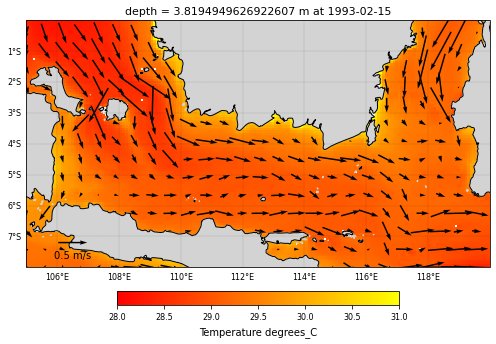

<Figure size 432x288 with 0 Axes>

In [ ]:
# Figure size
size = (7, 8)

# Color from cmocean
color = cmocean.cm.speed

# Defining the figure
fig = plt.figure(figsize=size, facecolor='w',
                 edgecolor='k')

# Axes with Cartopy projection
ax = plt.axes(projection=ccrs.PlateCarree())
# and extent
ax.set_extent([105, 120, 0, -8],
              ccrs.PlateCarree())

# Plotting using Matplotlib the mean current
cf = ds_wave.thetao.isel(time=1,depth=3).plot(
    transform=ccrs.PlateCarree(), cmap='autumn',
    vmin = 28, vmax = 31,
    add_colorbar=False
)

# Resampling using the slice method
resample = ds_wave.isel(time=1,longitude=slice(None, None, 7),
                              latitude=slice(None, None, 7), depth=1)

# Defining the quiver plot
quiver = resample.plot.quiver(x='longitude', y='latitude', u='uo', v='vo',
                              transform=ccrs.PlateCarree(), scale=8)

# Vector options declaration
veclenght = 0.5
maxstr = '%3.1f m/s' % veclenght
plt.quiverkey(quiver,0.1,0.1,veclenght,maxstr,labelpos='S',
              coordinates='axes').set_zorder(11)


# Color bar
cbar = fig.colorbar(cf, ax=ax, fraction=0.027, pad=0.045,
                    orientation="horizontal")
cbar.set_label(ds.thetao.long_name+' '+
               ds.thetao.units, rotation=0,
               labelpad=5, fontsize=10)
cbar.ax.tick_params(labelsize=8)

# Title
plt.title('depth = '+str(ds.depth.values.item(3))+' m at '+
          str(ds.thetao.coords['time'].values[1])[:10],
          fontsize=11
         )

# Plot lat/lon grid
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.1, color='k', alpha=1,
                  linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8}

# Add map features with Cartopy
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                            edgecolor='face',
                                            facecolor='lightgray'))
ax.coastlines(linewidth=1)

# Site Davies Reef
ax.scatter(-5, 110, c='deeppink', s=50, edgecolors='k',
           linewidth=1, transform=ccrs.PlateCarree()).set_zorder(11)

plt.tight_layout()
plt.show()
fig.clear()
plt.close(fig)
plt.clf()

In [ ]:
remote_data

<xarray.Dataset>
Dimensions:  (X: 1405, T: 1420, Y: 621)
Coordinates:
  * X        (X) float32 -125.0 -125.0 -124.9 -124.9 ... -66.58 -66.54 -66.5
  * T        (T) float32 -779.5 -778.5 -777.5 -776.5 ... 636.5 637.5 638.5 639.5
  * Y        (Y) float32 49.92 49.88 49.83 49.79 ... 24.21 24.17 24.12 24.08
Data variables:
    ppt      (T, Y, X) float64 ...
    tdmean   (T, Y, X) float64 ...
    tmax     (T, Y, X) float64 ...
    tmin     (T, Y, X) float64 ...
Attributes:
    Conventions:  IRIDL

<xarray.Dataset>
Dimensions:  (X: 1405, T: 1420, Y: 621)
Coordinates:
  * X        (X) float32 -125.0 -125.0 -124.9 -124.9 ... -66.58 -66.54 -66.5
  * T        (T) float32 -779.5 -778.5 -777.5 -776.5 ... 636.5 637.5 638.5 639.5
  * Y        (Y) float32 49.92 49.88 49.83 49.79 ... 24.21 24.17 24.12 24.08
Data variables:
    ppt      (T, Y, X) float64 ...
    tdmean   (T, Y, X) float64 ...
    tmax     (T, Y, X) float64 ...
    tmin     (T, Y, X) float64 ...
Attributes:
    Conventions:  IRIDL

In [ ]:
pip install xarray==0.19

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 827 kB 23.9 MB/s 
  Attempting uninstall: xarray
    Found existing installation: xarray 0.20.2
    Uninstalling xarray-0.20.2:
      Successfully uninstalled xarray-0.20.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray-einstats 0.2.2 requires xarray>=0.20, but you have xarray 0.19.0 which is incompatible.


In [ ]:
import matplotlib.pyplot as plt
import xarray as xr
import getpass

%matplotlib inline

In [ ]:
USERNAME = 'yahmadi'
PASSWORD = getpass.getpass('Enter your password: ')
DATASET_ID = 'global-analysis-forecast-phy-001-024-monthly'

Enter your password: ··········


In [ ]:
#! /usr/bin/env python3
# -*- coding: utf-8 -*-
__author__ = "Copernicus Marine User Support Team"
__copyright__ = "(C) 2022 E.U. Copernicus Marine Service Information"
__credits__ = ["E.U. Copernicus Marine Service Information"]
__license__ = "MIT License - You must cite this source"
__version__ = "202104"
__maintainer__ = "D. Bazin, E. DiMedio, C. Giordan"
__email__ = "servicedesk dot cmems at mercator hyphen ocean dot eu"

def copernicusmarine_datastore(dataset, username, password):
    from pydap.client import open_url
    from pydap.cas.get_cookies import setup_session
    cas_url = 'https://cmems-cas.cls.fr/cas/login'
    session = setup_session(cas_url, username, password)
    session.cookies.set("CASTGC", session.cookies.get_dict()['CASTGC'])
    database = ['my', 'nrt']
    url = f'https://{database[0]}.cmems-du.eu/thredds/dodsC/{dataset}'
    try:
        data_store = xr.backends.PydapDataStore(open_url(url, session=session, user_charset='utf-8')) # needs PyDAP >= v3.3.0 see https://github.com/pydap/pydap/pull/223/commits
    except:
        url = f'https://{database[1]}.cmems-du.eu/thredds/dodsC/{dataset}'
        data_store = xr.backends.PydapDataStore(open_url(url, session=session, user_charset='utf-8')) # needs PyDAP >= v3.3.0 see https://github.com/pydap/pydap/pull/223/commits
    return data_store

In [ ]:
!wget -q https://github.com/pydap/pydap/archive/refs/tags/3.3.0.tar.gz

In [ ]:
!sudo tar -xvf /content/3.3.0.tar.gz

pydap-3.3.0/
pydap-3.3.0/.coveragerc
pydap-3.3.0/.github/
pydap-3.3.0/.github/workflows/
pydap-3.3.0/.github/workflows/python.yml
pydap-3.3.0/.github/workflows/python_macos.yml
pydap-3.3.0/.gitignore
pydap-3.3.0/CODE_OF_CONDUCT.md
pydap-3.3.0/CONTRIBUTORS.md
pydap-3.3.0/LICENSE
pydap-3.3.0/MANIFEST.in
pydap-3.3.0/NEWS.md
pydap-3.3.0/README.md
pydap-3.3.0/TODO
pydap-3.3.0/bootstrap.py
pydap-3.3.0/buildout.cfg
pydap-3.3.0/conftest.py
pydap-3.3.0/docs/
pydap-3.3.0/docs/Makefile
pydap-3.3.0/docs/Special chars.odt
pydap-3.3.0/docs/_static/
pydap-3.3.0/docs/_static/default.css
pydap-3.3.0/docs/client.rst
pydap-3.3.0/docs/conf.py
pydap-3.3.0/docs/developer.rst
pydap-3.3.0/docs/developer_data_model.rst
pydap-3.3.0/docs/developer_handlers.rst
pydap-3.3.0/docs/developer_responses.rst
pydap-3.3.0/docs/developer_templating.rst
pydap-3.3.0/docs/handlers.rst
pydap-3.3.0/docs/index.rst
pydap-3.3.0/docs/license.rst
pydap-3.3.0/docs/make.bat
pydap-3.3.0/docs/responses.rst
pydap-3.3.0/docs/server.rst
py

In [ ]:
cd /content/pydap-3.3.0

/content/pydap-3.3.0


In [ ]:
!python setup.py install

running install
running bdist_egg
running egg_info
creating src/pydap.egg-info
writing src/pydap.egg-info/PKG-INFO
writing dependency_links to src/pydap.egg-info/dependency_links.txt
writing entry points to src/pydap.egg-info/entry_points.txt
writing namespace_packages to src/pydap.egg-info/namespace_packages.txt
writing requirements to src/pydap.egg-info/requires.txt
writing top-level names to src/pydap.egg-info/top_level.txt
writing manifest file 'src/pydap.egg-info/SOURCES.txt'
reading manifest file 'src/pydap.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
no previously-included directories found matching 'docs/_build'
adding license file 'LICENSE'
writing manifest file 'src/pydap.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/pydap
copying src/pydap/client.py -> build/lib/pydap
copying src/pydap/model.py -> build/lib/pydap
copying src/pydap/excepti

In [ ]:
data_store = copernicusmarine_datastore(DATASET_ID, USERNAME, PASSWORD)

In [ ]:
DS = xr.open_dataset(data_store)
DS

<xarray.Dataset>
Dimensions:    (latitude: 2041, depth: 50, longitude: 4320, time: 32)
Coordinates:
  * latitude   (latitude) float32 -80.0 -79.92 -79.83 ... 89.83 89.92 90.0
  * depth      (depth) float32 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
  * longitude  (longitude) float32 -180.0 -179.9 -179.8 ... 179.8 179.8 179.9
  * time       (time) datetime64[ns] 2020-01-16T12:00:00 ... 2022-08-16T12:00:00
Data variables:
    mlotst     (time, latitude, longitude) float32 ...
    zos        (time, latitude, longitude) float32 ...
    bottomT    (time, latitude, longitude) float32 ...
    sithick    (time, latitude, longitude) float32 ...
    siconc     (time, latitude, longitude) float32 ...
    usi        (time, latitude, longitude) float32 ...
    vsi        (time, latitude, longitude) float32 ...
    thetao     (time, depth, latitude, longitude) float32 ...
    so         (time, depth, latitude, longitude) float32 ...
    uo         (time, depth, latitude, longitude) float32 ...
    vo         (time, depth, latitude, longitude) float32 ...
Attributes: (12/14)
    title:                         Monthly mean fields for product GLOBAL_ANA...
    references:                    http://marine.copernicus.eu
    credit:                        E.U. Copernicus Marine Service Information...
    licence:                       http://marine.copernicus.eu/services-portf...
    contact:                       servicedesk.cmems@mercator-ocean.eu
    producer:                      CMEMS - Global Monitoring and Forecasting ...
    ...                            ...
    area:                          GLOBAL
    product:                       GLOBAL_ANALYSIS_FORECAST_PHY_001_024
    dataset:                       global-analysis-forecast-phy-001-024-monthly
    source:                        MERCATOR PSY4QV3R1
    product_user_manual:           http://marine.copernicus.eu/documents/PUM/...
    quality_information_document:  http://marine.copernicus.eu/documents/QUID...

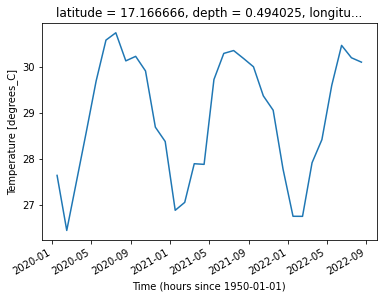

In [ ]:
# gridpoint close to eastern Philippines coast, to observe the cyclone's influence on the wave height (VHM0), during its impacting period:
lat = 17.127
lon = 125.361
target_time=slice("2021-04-12", "2021-05-02")

#we call the parameters and we plot the timeseries:
storm = DS.thetao.sel(longitude=lon, latitude=lat, depth=1 , method="nearest")
#plot
storm.plot()

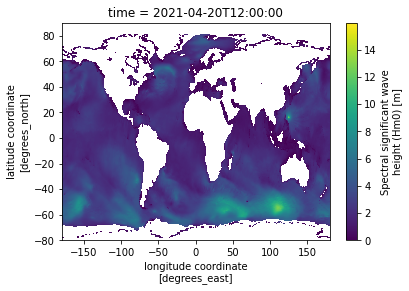

In [ ]:
DS.VHM0.sel(time="2021-04-20 12:00:00").plot()

In [ ]:
crop = DS.sel(time="2021-01-01 12:00:00", longitude=slice(95, 141), latitude=slice(-12,6))

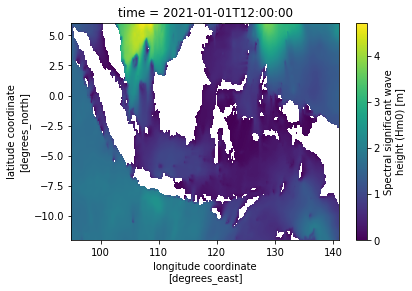

In [ ]:
crop.VHM0.plot()

In [ ]:
xr.Dataset(crop).to_netcdf('dO18Buton.nc', engine='netcdf4')